<a href="https://colab.research.google.com/github/Alao001/boilerplate/blob/master/Apple_Stock_Forecasting_Price_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIM OF THE PROJECT

To trained LSTM model that can forecast Apple's stock prices with a certain degree of accuracy.

I chose using a Long Short-Term Memory (LSTM) network because it is a type of recurrent neural network (RNN) well-suited for time series prediction

Note: Stock prices are inherently complex and influenced by various factors. While LSTMs can learn patterns, their predictions should not be considered financial advice.

Import the dependencies

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


Downloading historical stock price data from **Yahoo Finance** for the Apple's stock.

In [2]:
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

end_date = today.strftime("%Y-%m-%d")
start_date = (today - timedelta(days=10000)).strftime("%Y-%m-%d")

In [3]:
Apple_stock_data = yf.download('AAPL',start=start_date, end=end_date,progress=False)

In [4]:
# print the 5 latest row
Apple_stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100
2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600
2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59288400


In [5]:

Apple_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-02,0.151786,0.152902,0.149554,0.151786,0.128180,101987200
1997-05-05,0.151786,0.152902,0.149554,0.151786,0.128180,98492800
1997-05-06,0.151786,0.152902,0.149554,0.150670,0.127237,83148800
1997-05-07,0.150670,0.151786,0.146205,0.147321,0.124409,114217600
1997-05-08,0.148438,0.152902,0.147321,0.151786,0.128180,82936000


In [6]:
Apple_stock_data['Date'] = Apple_stock_data.index
Apple_stock_data = Apple_stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
Apple_stock_data.reset_index(drop=True, inplace=True)
Apple_stock_data.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
6883,2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
6884,2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100
6885,2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
6886,2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600
6887,2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59288400


In [7]:
Apple_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-02,0.151786,0.152902,0.149554,0.151786,0.128180,101987200
1,1997-05-05,0.151786,0.152902,0.149554,0.151786,0.128180,98492800
2,1997-05-06,0.151786,0.152902,0.149554,0.150670,0.127237,83148800
3,1997-05-07,0.150670,0.151786,0.146205,0.147321,0.124409,114217600
4,1997-05-08,0.148438,0.152902,0.147321,0.151786,0.128180,82936000


In [8]:
# print the shape of the dataset
Apple_stock_data.shape

(6888, 7)

In [9]:
# Check Missing values
Apple_stock_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
# Check data type
Apple_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6888 non-null   datetime64[ns]
 1   Open       6888 non-null   float64       
 2   High       6888 non-null   float64       
 3   Low        6888 non-null   float64       
 4   Close      6888 non-null   float64       
 5   Adj Close  6888 non-null   float64       
 6   Volume     6888 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 376.8 KB


Visualizing Apple Stock Prices with Plotly

In [11]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=Apple_stock_data['Date'],
                                                    open = Apple_stock_data['Open'],
                                                    high = Apple_stock_data['High'],
                                                    low = Apple_stock_data['Low'],
                                                    close = Apple_stock_data['Close'])])
figure.update_layout(title = 'Apple Stock Price Analysis',
                     xaxis_rangeslider_visible=False)
figure.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [12]:
# calculates the correlation between the "Close" price column and all other columns
correlation = Apple_stock_data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
High         0.999933
Low          0.999932
Open         0.999855
Adj Close    0.999826
Date         0.795720
Volume      -0.437613
Name: Close, dtype: float64


Data Selection

In [13]:
Apple_stock_data = Apple_stock_data[['Date','Close']]
Apple_stock_data

,Date,Close
0,1997-05-02,0.151786
1,1997-05-05,0.151786
2,1997-05-06,0.150670
3,1997-05-07,0.147321
4,1997-05-08,0.151786
...,...,...
6883,2024-09-10,220.110001
6884,2024-09-11,222.660004
6885,2024-09-12,222.770004
6886,2024-09-13,222.500000


In [14]:
# Device configuration for pyTorch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

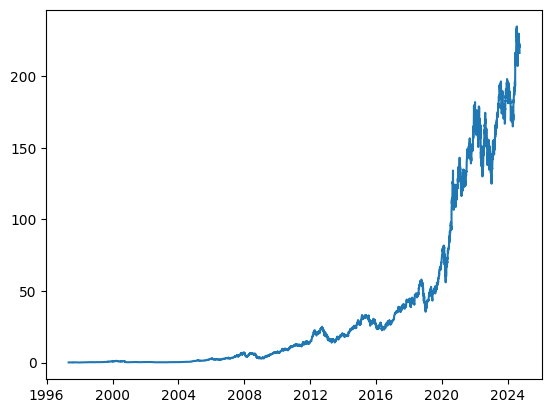

In [15]:
# Data Visualization
plt.plot(Apple_stock_data['Date'], Apple_stock_data['Close'])

Preparing Stock Data for LSTM Modeling

In [16]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, sequence_length):
    df = dc(df)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    for i in range(1, sequence_length + 1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(Apple_stock_data, lookback)
shifted_df


,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-13,0.156808,0.156808,0.152344,0.151786,0.147321,0.150670,0.151786,0.151786
1997-05-14,0.157924,0.156808,0.156808,0.152344,0.151786,0.147321,0.150670,0.151786
1997-05-15,0.158482,0.157924,0.156808,0.156808,0.152344,0.151786,0.147321,0.150670
1997-05-16,0.154018,0.158482,0.157924,0.156808,0.156808,0.152344,0.151786,0.147321
1997-05-19,0.151786,0.154018,0.158482,0.157924,0.156808,0.156808,0.152344,0.151786
...,...,...,...,...,...,...,...,...
2024-09-10,220.110001,220.910004,220.820007,222.380005,220.850006,222.770004,229.000000,229.789993
2024-09-11,222.660004,220.110001,220.910004,220.820007,222.380005,220.850006,222.770004,229.000000
2024-09-12,222.770004,222.660004,220.110001,220.910004,220.820007,222.380005,220.850006,222.770004


In [17]:
# Conversion to NumPy Array
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[1.56808004e-01, 1.56808004e-01, 1.52344003e-01, ...,
        1.50670007e-01, 1.51786000e-01, 1.51786000e-01],
       [1.57923996e-01, 1.56808004e-01, 1.56808004e-01, ...,
        1.47321001e-01, 1.50670007e-01, 1.51786000e-01],
       [1.58482000e-01, 1.57923996e-01, 1.56808004e-01, ...,
        1.51786000e-01, 1.47321001e-01, 1.50670007e-01],
       ...,
       [2.22770004e+02, 2.22660004e+02, 2.20110001e+02, ...,
        2.22380005e+02, 2.20850006e+02, 2.22770004e+02],
       [2.22500000e+02, 2.22770004e+02, 2.22660004e+02, ...,
        2.20820007e+02, 2.22380005e+02, 2.20850006e+02],
       [2.16320007e+02, 2.22500000e+02, 2.22770004e+02, ...,
        2.20910004e+02, 2.20820007e+02, 2.22380005e+02]])

Data Nomalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np_scaled = scaler.fit_transform(shifted_df_as_np)
shifted_df_as_np_scaled

array([[-0.99964811, -0.99964811, -0.99968615, ..., -0.99970041,
        -0.9996909 , -0.9996909 ],
       [-0.9996386 , -0.99964811, -0.99964811, ..., -0.99972895,
        -0.99970041, -0.9996909 ],
       [-0.99963385, -0.9996386 , -0.99964811, ..., -0.9996909 ,
        -0.99972895, -0.99970041],
       ...,
       [ 0.89731766,  0.89638031,  0.87465083, ...,  0.89399434,
         0.88095668,  0.89731766],
       [ 0.89501686,  0.89731766,  0.89638031, ...,  0.88070105,
         0.89399434,  0.88095668],
       [ 0.84235496,  0.89501686,  0.89731766, ...,  0.88146794,
         0.88070105,  0.89399434]])

Feature and Target Variable Separation

In [19]:
X = shifted_df_as_np_scaled[:, 1:]
y = shifted_df_as_np_scaled[:, 0]
X.shape, y.shape

((6881, 7), (6881,))

In [20]:
# reorder input features
X = dc(np.flip(X, axis=1))
X

array([[-0.9996909 , -0.9996909 , -0.99970041, ..., -0.9996909 ,
        -0.99968615, -0.99964811],
       [-0.9996909 , -0.99970041, -0.99972895, ..., -0.99968615,
        -0.99964811, -0.99964811],
       [-0.99970041, -0.99972895, -0.9996909 , ..., -0.99964811,
        -0.99964811, -0.9996386 ],
       ...,
       [ 0.89731766,  0.88095668,  0.89399434, ...,  0.88146794,
         0.87465083,  0.89638031],
       [ 0.88095668,  0.89399434,  0.88070105, ...,  0.87465083,
         0.89638031,  0.89731766],
       [ 0.89399434,  0.88070105,  0.88146794, ...,  0.89638031,
         0.89731766,  0.89501686]])

In [21]:
split_index = int(len(X) * 0.9)
split_index

6192

In [22]:
# Apply the split to dataset
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6192, 7), (689, 7), (6192,), (689,))

Reshaping and Formatting

In [23]:
# reshaping the prepared stock data into a format suitable for training an LSTM model
X_train = X_train.reshape(-1, lookback, 1)
X_test = X_test.reshape(-1, lookback, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6192, 7, 1), (689, 7, 1), (6192, 1), (689, 1))

Conversion to PyTorch Tensors

In [24]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6192, 7, 1]),
 torch.Size([689, 7, 1]),
 torch.Size([6192, 1]),
 torch.Size([689, 1]))

Creating Custom Datasets for LSTM Models in PyTorch

In [25]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_dataset[0], test_dataset[0]


((tensor([[-0.9997],
          [-0.9997],
          [-0.9997],
          [-0.9997],
          [-0.9997],
          [-0.9997],
          [-0.9996]]),
  tensor([-0.9996])),
 (tensor([[0.4909],
          [0.4865],
          [0.5282],
          [0.4966],
          [0.4845],
          [0.5269],
          [0.4669]]),
  tensor([0.4574])))

Data Loaders for Training and Testing

In [26]:
from torch.utils.data import DataLoader

batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [27]:
for _,batch in enumerate(train_dataloader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


Defining the LSTM Model

In [28]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [29]:
model = LSTM(1, 32, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

Training Function for One Epoch

In [30]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch+1}')
    running_loss = 0.0
    # Loop Over Training Batches
    for batch_index, batch in enumerate(train_dataloader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)
        # Forward Pass
        output = model(X_batch)
        # Calculate Loss
        loss = criterion(output, y_batch)
        running_loss += loss.item()
        # Backward Pass
        optimizer.zero_grad()
        loss.backward()
        # Update Weights
        optimizer.step()

        # Print Progress Every 100 batches
        if batch_index % 100 == 99:
            avg_loss_accross_batches = running_loss / 100
            print(f'Batch: {batch_index+1}, Loss: {avg_loss_accross_batches:{1:.3f}}')
            running_loss = 0.0
    print()


Validation Function for One Epoch

In [31]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    # Loop Over Batches from Test Data
    for batch_index, batch in enumerate(test_dataloader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        # Disabling Gradient Computation
        with torch.no_grad():
            # Forward Pass
            output = model(X_batch)
            # Calculate Loss
            loss = criterion(output, y_batch)
            # Accumulate Loss
            running_loss += loss.item()


    avg_loss_accross_batches = running_loss / len(test_dataloader)
    print(f'Validation Loss: {avg_loss_accross_batches:{0:.3f}}')
    print('...............................................')
    print()



Model Training Setup and Execution

In [32]:
learning_rate = 0.001
num_epochs = 10
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop Over Epochs
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch: 100, Loss: 0.2
Batch: 200, Loss: 0.009
Batch: 300, Loss: 0.001

Validation Loss: 0.05
...............................................

Epoch: 2
Batch: 100, Loss: 0.0002
Batch: 200, Loss: 0.0002
Batch: 300, Loss: 0.0002

Validation Loss: 0.02
...............................................

Epoch: 3
Batch: 100, Loss: 0.0002
Batch: 200, Loss: 0.0002
Batch: 300, Loss: 0.0002

Validation Loss: 0.02
...............................................

Epoch: 4
Batch: 100, Loss: 0.0001
Batch: 200, Loss: 0.0002
Batch: 300, Loss: 0.0002

Validation Loss: 0.02
...............................................

Epoch: 5
Batch: 100, Loss: 0.0002
Batch: 200, Loss: 0.0002
Batch: 300, Loss: 0.0001

Validation Loss: 0.01
...............................................

Epoch: 6
Batch: 100, Loss: 0.0001
Batch: 200, Loss: 0.0001
Batch: 300, Loss: 0.0001

Validation Loss: 0.006
...............................................

Epoch: 7
Batch: 100, Loss: 0.0001
Batch: 200, Loss: 0.0001
Batch: 30

Model Prediction and Performance Visualization on Training Data

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

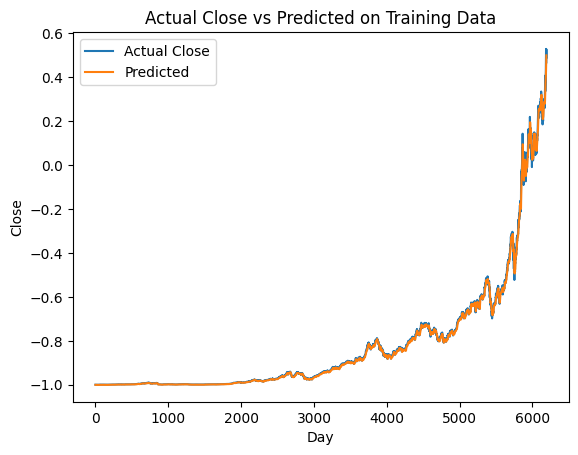

In [33]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Close')
plt.title('Actual Close vs Predicted on Training Data')
plt.legend()
plt

In [34]:
predicted.shape, y_test.shape

((6192, 1), torch.Size([689, 1]))

Reversing Scaling on Training Predictions

In [35]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([7.15300780e-02, 7.24533836e-02, 7.36145103e-02, ...,
       1.72955402e+02, 1.74539354e+02, 1.76017769e+02])

Inverse Scaling of Actual Training Data

In [36]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([1.56809936e-01, 1.57922100e-01, 1.58481679e-01, ...,
       1.74330001e+02, 1.79300001e+02, 1.72259995e+02])

Visual Comparison of Actual vs. Predicted Training Prices

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

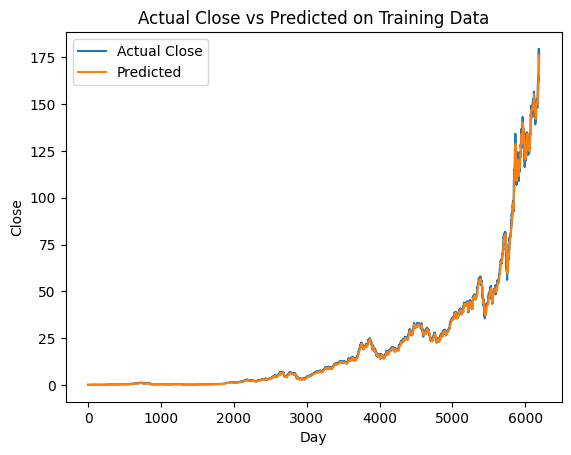

In [37]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Close')
plt.title('Actual Close vs Predicted on Training Data')
plt.legend()
plt

Generating and Rescaling Predictions on Test Data

In [38]:
test_predictions = model(X_test.to(device)).detach().to('cpu').numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions


array([176.16902983, 175.58155569, 174.71862173, 173.79093048,
       173.63896278, 173.83489242, 174.31733356, 175.50799901,
       176.74587896, 177.80691092, 178.32411591, 178.96123171,
       179.33481373, 178.80584359, 177.88558774, 176.82664721,
       175.80978003, 175.14723136, 174.4159244 , 173.77582884,
       173.65242066, 173.38869102, 172.52245555, 171.22734465,
       169.35440186, 167.36802888, 165.51845901, 163.70666072,
       162.31562048, 162.73064632, 164.37052091, 166.50744166,
       168.89670461, 170.98015057, 172.61563946, 173.74234503,
       174.02786328, 174.17885871, 173.98718188, 173.24836956,
       172.63828843, 172.44571627, 172.36661976, 171.67847733,
       170.72678014, 169.77667775, 168.43550649, 167.13013081,
       165.87906578, 164.99749084, 164.43945406, 164.51980963,
       164.98713164, 165.36815256, 164.85548016, 163.72858573,
       163.1353864 , 162.33409358, 160.77404295, 158.73776251,
       157.4582184 , 157.25824931, 157.59681216, 158.20

Reverting Scaling on Actual Test Data

In [39]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test


array([171.13999784, 169.74999981, 172.99000489, 175.64000023,
       176.28000136, 180.33000421, 179.28999144, 179.38000674,
       178.19999427, 177.5700061 , 182.00999363, 179.69999506,
       174.91999677, 172.00000101, 172.16999764, 172.1900026 ,
       175.08000143, 175.52999747, 172.1900026 , 173.07000722,
       169.8000017 , 166.22999533, 164.50999601, 162.41000399,
       161.61999368, 159.77999961, 159.6900018 , 159.2200008 ,
       170.33000357, 174.77999707, 174.61000043, 175.83999731,
       172.89999309, 172.38999967, 171.66000423, 174.83000246,
       176.28000136, 172.11999575, 168.63999768, 168.88000467,
       172.78999382, 172.55000433, 168.88000467, 167.30000154,
       164.3200084 , 160.07000848, 162.74000528, 164.85000677,
       165.1199967 , 163.1999968 , 166.55999663, 166.22999533,
       163.16999987, 159.30000313, 157.4400041 , 162.94999784,
       158.52000579, 154.72999739, 150.61999368, 155.08999563,
       159.58999801, 160.61999432, 163.97999414, 165.38

Plotting Actual vs. Predicted Test Prices

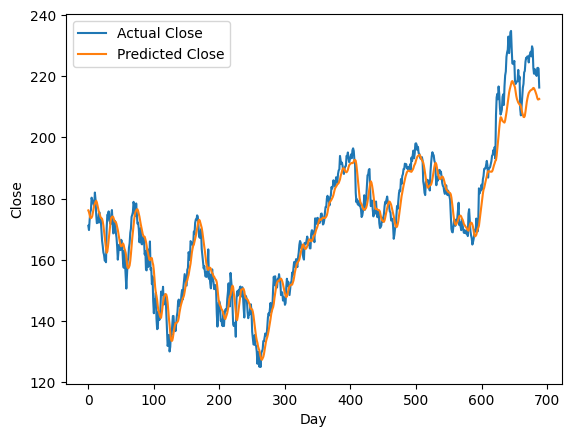

In [40]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()